In [1]:
# Connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# Importing the required libraries
import pandas as pa
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Conv1D, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from keras.optimizers import adam

In [79]:
# Reading the train.tsv into train_data1
train_data1 = pa.read_csv("/content/drive/My Drive/Lab2/Datasets/train.tsv",sep="\t")
# Reading the test.tsv into test.tsv
test_data1 = pa.read_csv("/content/drive/My Drive/Lab2/Datasets/test.tsv",sep="\t")
# Printing the shape of the datasets
print(train_data1.shape)
train_data1.head
print(test_data1.shape)
test_data1.head
# Dropping the unwanted columns
train_data1 = train_data1.drop(columns=['PhraseId', 'SentenceId'])
# Removing the non-alphabetic characters
train_data1['Phrase'] = train_data1['Phrase'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x.lower()))
test_data1 = test_data1.drop(columns=['PhraseId', 'SentenceId'])
test_data1['Phrase'] = test_data1['Phrase'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x.lower()))

(156060, 4)
(66292, 3)


In [0]:
# Taking the target column and deopping it from the training data
label1=train_data1[['Sentiment']]
train_data1=train_data1.drop(columns=['Sentiment'])

In [0]:
# Tokenization on train data
max_feature1 = 4000
tokenizer = Tokenizer(num_words=max_feature1, split=' ')
tokenizer.fit_on_texts(train_data1['Phrase'].values)
X_train1 = tokenizer.texts_to_sequences(train_data1['Phrase'].values)
X_train1 = pad_sequences(X_train1)

In [0]:
# Tokenization on test data
max_feature2 = 2000
tokenizer = Tokenizer(num_words=max_feature2, split=' ')
tokenizer.fit_on_texts(test_data1['Phrase'].values)
X_test1 = tokenizer.texts_to_sequences(test_data1['Phrase'].values)
X_test1 = pad_sequences(X_test1)

In [124]:
X_train1.shape

(156060, 46)

In [125]:
X_test1.shape

(66292, 46)

In [126]:
# Performing train test and split
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(label1)
Y_train1 = to_categorical(integer_encoded)
X_train, X_test, Y_train, Y_test = train_test_split(X_train1, Y_train1, test_size=0.2, random_state=10)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(124848, 46) (124848, 5)
(31212, 46) (31212, 5)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [127]:
# Creating a LSTM Model
embed_dim = 64
lstm_out = 32
model1 = Sequential()
model1.add(Embedding(13734, embed_dim, input_length = X_train1.shape[1]))
model1.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(Y_train1.shape[1],activation='softmax'))
model1.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model1.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 46, 64)            878976    
_________________________________________________________________
lstm_16 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 165       
Total params: 891,557
Trainable params: 891,557
Non-trainable params: 0
_________________________________________________________________
None


In [128]:
# Fitting the model
history1=model1.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=3, batch_size=512, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 124848 samples, validate on 31212 samples
Epoch 1/3
124848/124848 [==============================] - 25s 201us/step - loss: 1.1971 - accuracy: 0.5311 - val_loss: 1.0457 - val_accuracy: 0.5834
Epoch 2/3
124848/124848 [==============================] - 25s 197us/step - loss: 0.9766 - accuracy: 0.6156 - val_loss: 0.9406 - val_accuracy: 0.6258
Epoch 3/3
124848/124848 [==============================] - 24s 196us/step - loss: 0.9153 - accuracy: 0.6388 - val_loss: 0.9226 - val_accuracy: 0.6340


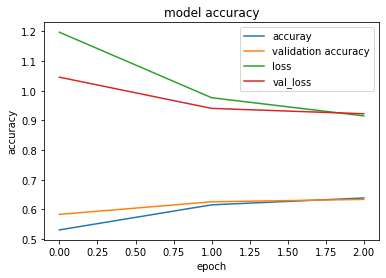

In [129]:
# Plotting acc,val_acc,loss,val_loss
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'])
plt.show()

In [130]:
y_predicted=model1.predict_classes(X_test1[:1])
print(y_predicted[0]," PREDICTED LABEL")

2  PREDICTED LABEL


In [131]:
file = pa.read_csv('/content/drive/My Drive/Lab2/Datasets/sampleSubmission.csv',sep=',')
print(file['Sentiment'].iloc[0]," ACTUAL LABEL")

2  ACTUAL LABEL


# (6) Tuning the parameters to achieve good accuracy for LSTM Model

In [132]:
# Creating a LSTM Model
embed_dim = 128
lstm_out = 64
model2 = Sequential()
model2.add(Embedding(13734, embed_dim, input_length = X_train1.shape[1]))
model2.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(Y_train1.shape[1],activation='softmax'))
model2.compile(loss = 'binary_crossentropy', optimizer=adam(lr=0.01),metrics = ['accuracy'])
print(model2.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 46, 128)           1757952   
_________________________________________________________________
lstm_17 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 325       
Total params: 1,807,685
Trainable params: 1,807,685
Non-trainable params: 0
_________________________________________________________________
None


In [133]:
# Fitting the model
history2=model2.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=5, batch_size=256, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 124848 samples, validate on 31212 samples
Epoch 1/5
124848/124848 [==============================] - 50s 399us/step - loss: 0.3341 - accuracy: 0.8512 - val_loss: 0.3116 - val_accuracy: 0.8600
Epoch 2/5
124848/124848 [==============================] - 49s 396us/step - loss: 0.3020 - accuracy: 0.8650 - val_loss: 0.3057 - val_accuracy: 0.8628
Epoch 3/5
124848/124848 [==============================] - 49s 396us/step - loss: 0.2893 - accuracy: 0.8714 - val_loss: 0.3060 - val_accuracy: 0.8632
Epoch 4/5
124848/124848 [==============================] - 49s 390us/step - loss: 0.2815 - accuracy: 0.8754 - val_loss: 0.3061 - val_accuracy: 0.8629
Epoch 5/5
124848/124848 [==============================] - 49s 389us/step - loss: 0.2759 - accuracy: 0.8780 - val_loss: 0.3091 - val_accuracy: 0.8631


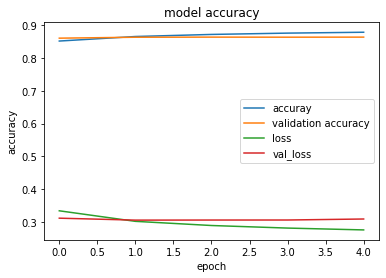

In [134]:
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'])
plt.show()